In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib


In [2]:
df = pd.read_csv("final/lahti_df.csv")
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Lahti Laune,2004,1,1,2004-01-01,15.0,-10.4,NaN,14.0
1,Lahti Laune,2004,1,2,2004-01-02,15.0,-16.0,NaN,14.2
2,Lahti Laune,2004,1,3,2004-01-03,14.8,-20.9,NaN,11.0
3,Lahti Laune,2004,1,4,2004-01-04,15.1,-8.8,NaN,5.2
4,Lahti Laune,2004,1,5,2004-01-05,17.3,-6.9,NaN,6.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7677 entries, 0 to 7676
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Observation station           7215 non-null   object 
 1   Year                          7677 non-null   int64  
 2   Month                         7677 non-null   int64  
 3   Day                           7677 non-null   int64  
 4   Date                          7677 non-null   object 
 5   Snow depth mean [cm]          7137 non-null   float64
 6   Average temperature [°C]      7677 non-null   float64
 7   cloud_code                    7128 non-null   float64
 8   Global radiation mean [W/m2]  7609 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 539.9+ KB


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df.head()

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],day_of_year
0,2004,1,1,2004-01-01,15.0,-10.4,NaN,14.0,1
1,2004,1,2,2004-01-02,15.0,-16.0,NaN,14.2,2
2,2004,1,3,2004-01-03,14.8,-20.9,NaN,11.0,3
3,2004,1,4,2004-01-04,15.1,-8.8,NaN,5.2,4
4,2004,1,5,2004-01-05,17.3,-6.9,NaN,6.1,5


In [5]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [6]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.5096269125456536
Mean Squared Error: 114.5345716092907


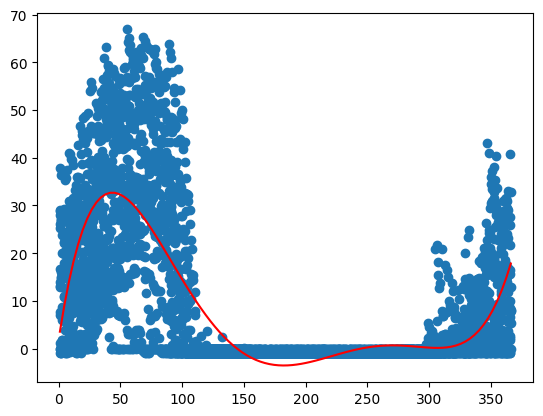

In [11]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 5))

myline = np.linspace(1, 366, 100)

plt.scatter(X_train["day_of_year"], y_train)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [12]:
snowdept = mymodel(range(7,21))
print(snowdept)

[12.35391099 13.63212378 14.85888128 16.0352232  17.16217736 18.24075974
 19.27197455 20.25681428 21.19625977 22.0912803  22.94283358 23.7518659
 24.51931211 25.24609576]


In [14]:
joblib.dump(model, 'lahti_snow_depth_predictor.pkl')

['lahti_snow_depth_predictor.pkl']